- [ ] Define treatment
- [ ] Define outcomes
 - [ ] primary outcomes
 - [ ] secondary outcomes
- [ ] compare outcomes with covariates
 - [ ] present in a table, like other papers

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# set font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

# set the style of the axes and the text color
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'

In [3]:
data = pd.read_csv("delirium_data_cleaned.csv")
data.shape

(1671, 31)

In [4]:
data.columns

Index(['subject_id', 'hadm_id', 'icustay_id', 'sex', 'age', 'race',
       'icd9_codes', 'sofa', 'apsiii', 'surgery', 'pneumonia', 'sepsis',
       'dementia', 'alzheimers', 'depression', 'anxiety', 'met_acidosis',
       'airway_obs', 'copd', 'liver_disease', 'heart_disease', 'mechvent',
       'mechvent_count', 'drug_group', 'drug_categories_distinct_count',
       'drug_timelength', 'death_hosp', 'death_timeline', 'los_days',
       'time_to_mechvent', 'time_in_mechvent'],
      dtype='object')

In [5]:
print("Subject count:", len(data.subject_id.unique()))
print("Hosp Adm count:", len(data.hadm_id.unique()))
print("ICU Stay count:", len(data.icustay_id.unique()))

Subject count: 1398
Hosp Adm count: 1445
ICU Stay count: 1666


In [6]:
print(data.groupby("drug_group")["icustay_id"].nunique())

drug_group
HL    672
ND    461
OD    535
Name: icustay_id, dtype: int64


In [7]:
print(data[data['drug_group'] == 'HL'].shape[0], data[data['drug_group'] == 'ND'].shape[0], data[data['drug_group'] == 'OD'].shape[0])

673 462 536


In [8]:
print(data[data['sex'] == 'M'].shape[0], data[data['sex'] == 'F'].shape[0])

970 701


In [9]:
print(data[data['sepsis'] == 1].shape[0], data[data['pneumonia'] == 1].shape[0], data[data['heart_disease'] == 1].shape[0], data[data['liver_disease'] == 1].shape[0]) 


375 484 1035 97


In [10]:
print(data.groupby("death_timeline")["icustay_id"].nunique())

death_timeline
-1    821
 1    311
 2    108
 3    175
 4    253
Name: icustay_id, dtype: int64


sex---count of cat. / percent female
race---count of cat.

age---mean+-sd
icd9 codes---X
sofa ---score-mean+-sd
apsiii---score-mean+-sd

surgery---count (percent)
pneumonia---count (percent) 
sepsis---count (percent)
dementia---count (percent)
alzheimers---count (percent)
depression---count (percent)
anxiety ---count (percent)
met. acidosis ---count (percent)
airway obs. ---count (percent)
copd---count (percent)
liver disease---count (percent)
heart disease ---count (percent)
mechvent. ---count (percent)

mechvent. count---mean+-sd
time to mechvent---mean+-sd
(Treatment) drug group---X
drug timelength---mean+-sd
categories count---X

(Outcome) time in mechvent---score-mean+-sd
(Outcome) death timeline---count of cat.
(Outcome) length of stay---score-mean+-sd

In [11]:
def formatted(n):
    return "{:.2f}".format(n)

In [12]:
def get_count_data(feature):
    # d = {"total": -1, "hal": -1, "no-drug": -1, "other-drug": -1}
    d = {}
    tot = data.shape[0]
    hal = data[data['drug_group'] == 'HL'].shape[0]
    no = data[data['drug_group'] == 'ND'].shape[0]
    other = data[data['drug_group'] == 'OD'].shape[0]

    d["name"] = feature
    d["total"] = data[data[feature] == 1].shape[0]
    d["total_percent"] = formatted((d["total"] * 100) / tot)
    d["hal"] = data[(data['drug_group'] == 'HL') & (data[feature] == 1)].shape[0]
    d["hal_percent"] = formatted((d["hal"] * 100) / hal)
    d["no"] = data[(data['drug_group'] == 'ND') & (data[feature] == 1)].shape[0]
    d["no_percent"] = formatted((d["no"] * 100) / no)
    d["other"] = data[(data['drug_group'] == 'OD') & (data[feature] == 1)].shape[0]
    d["other_percent"] = formatted((d["other"] * 100) / other) 
    return d

In [13]:
def get_mean_sd_data(feature):
    d = {}
    tot = data.shape[0]
    hal = data[data['drug_group'] == 'HL'].shape[0]
    no = data[data['drug_group'] == 'ND'].shape[0]
    other = data[data['drug_group'] == 'OD'].shape[0]

    d["name"] = feature
    d["total_mean"] = formatted(data[feature].mean(skipna=True))
    d["total_sd"] = formatted(data[feature].std(skipna=True))
    d["hal_mean"] = formatted(data[data['drug_group'] == 'HL'][feature].mean(skipna=True))
    d["hal_sd"] = formatted(data[data['drug_group'] == 'HL'][feature].std(skipna=True))
    d["no_mean"] = formatted(data[data['drug_group'] == 'ND'][feature].mean(skipna=True))
    d["no_sd"] = formatted(data[data['drug_group'] == 'ND'][feature].std(skipna=True))
    d["other_mean"] = formatted(data[data['drug_group'] == 'OD'][feature].mean(skipna=True))
    d["other_sd"] = formatted(data[data['drug_group'] == 'OD'][feature].std(skipna=True))
    return d

In [14]:
tot = data.shape[0]
hal = data[data['drug_group'] == 'HL'].shape[0]
no = data[data['drug_group'] == 'ND'].shape[0]
other = data[data['drug_group'] == 'OD'].shape[0]

In [15]:
print(tot, hal, no, other)

1671 673 462 536


In [16]:
d = {}
feature = "sex"
d["name"] = feature
d["total"] = data[data[feature] == 'F'].shape[0]
d["total_percent"] = formatted((d["total"] * 100) / tot)
d["hal"] = data[(data['drug_group'] == 'HL') & (data[feature] == 'F')].shape[0]
d["hal_percent"] = formatted((d["hal"] * 100) / hal)
d["no"] = data[(data['drug_group'] == 'ND') & (data[feature] == 'F')].shape[0]
d["no_percent"] = formatted((d["no"] * 100) / no)
d["other"] = data[(data['drug_group'] == 'OD') & (data[feature] == 'F')].shape[0]
d["other_percent"] = formatted((d["other"] * 100) / other)
print(d)

{'name': 'sex', 'total': 701, 'total_percent': '41.95', 'hal': 232, 'hal_percent': '34.47', 'no': 216, 'no_percent': '46.75', 'other': 253, 'other_percent': '47.20'}


In [17]:
d = {}
feature = "race"
d["name"] = feature

d["total_w"] = data[data[feature] == 1].shape[0]
d["total_w_p"] = formatted((d["total_w"] * 100) / tot)
d["total_b"] = data[data[feature] == 2].shape[0]
d["total_b_p"] = formatted((d["total_b"] * 100) / tot)
d["total_h"] = data[data[feature] == 3].shape[0]
d["total_h_p"] = formatted((d["total_h"] * 100) / tot)
d["total_a"] = data[data[feature] == 4].shape[0]
d["total_a_p"] = formatted((d["total_a"] * 100) / tot)

d["hal_w"] = data[(data['drug_group'] == 'HL') & (data[feature] == 1)].shape[0]
d["hal_w_p"] = formatted((d["hal_w"] * 100) / hal)
d["hal_b"] = data[(data['drug_group'] == 'HL') & (data[feature] == 2)].shape[0]
d["hal_b_p"] = formatted((d["hal_b"] * 100) / hal)
d["hal_h"] = data[(data['drug_group'] == 'HL') & (data[feature] == 3)].shape[0]
d["hal_h_p"] = formatted((d["hal_h"] * 100) / hal)
d["hal_a"] = data[(data['drug_group'] == 'HL') & (data[feature] == 4)].shape[0]
d["hal_a_p"] = formatted((d["hal_a"] * 100) / hal)

d["no_w"] = data[(data['drug_group'] == 'OD') & (data[feature] == 1)].shape[0]
d["no_w_p"] = formatted((d["no_w"] * 100) / no)
d["no_b"] = data[(data['drug_group'] == 'OD') & (data[feature] == 2)].shape[0]
d["no_b_p"] = formatted((d["no_b"] * 100) / no)
d["no_h"] = data[(data['drug_group'] == 'OD') & (data[feature] == 3)].shape[0]
d["no_h_p"] = formatted((d["no_h"] * 100) / no)
d["no_a"] = data[(data['drug_group'] == 'OD') & (data[feature] == 4)].shape[0]
d["no_a_p"] = formatted((d["no_a"] * 100) / no)

d["other_w"] = data[(data['drug_group'] == 'OD') & (data[feature] == 1)].shape[0]
d["other_w_p"] = formatted((d["other_w"] * 100) / other)
d["other_b"] = data[(data['drug_group'] == 'OD') & (data[feature] == 2)].shape[0]
d["other_b_p"] = formatted((d["other_b"] * 100) / other)
d["other_h"] = data[(data['drug_group'] == 'OD') & (data[feature] == 3)].shape[0]
d["other_h_p"] = formatted((d["other_h"] * 100) / other)
d["other_a"] = data[(data['drug_group'] == 'OD') & (data[feature] == 4)].shape[0]
d["other_a_p"] = formatted((d["other_a"] * 100) / other)

print(d)

{'name': 'race', 'total_w': 1312, 'total_w_p': '78.52', 'total_b': 123, 'total_b_p': '7.36', 'total_h': 43, 'total_h_p': '2.57', 'total_a': 27, 'total_a_p': '1.62', 'hal_w': 542, 'hal_w_p': '80.53', 'hal_b': 32, 'hal_b_p': '4.75', 'hal_h': 21, 'hal_h_p': '3.12', 'hal_a': 11, 'hal_a_p': '1.63', 'no_w': 419, 'no_w_p': '90.69', 'no_b': 42, 'no_b_p': '9.09', 'no_h': 11, 'no_h_p': '2.38', 'no_a': 5, 'no_a_p': '1.08', 'other_w': 419, 'other_w_p': '78.17', 'other_b': 42, 'other_b_p': '7.84', 'other_h': 11, 'other_h_p': '2.05', 'other_a': 5, 'other_a_p': '0.93'}


In [18]:
print(get_count_data("surgery"))
print(get_count_data("pneumonia"))
print(get_count_data("sepsis"))
print(get_count_data("dementia"))
print(get_count_data("alzheimers"))
print(get_count_data("depression"))
print(get_count_data("anxiety"))
print(get_count_data("met_acidosis"))
print(get_count_data("airway_obs"))
print(get_count_data("copd"))
print(get_count_data("liver_disease"))
print(get_count_data("heart_disease"))
print(get_count_data("mechvent"))
print(get_count_data("drug_timelength"))

{'name': 'surgery', 'total': 866, 'total_percent': '51.83', 'hal': 376, 'hal_percent': '55.87', 'no': 190, 'no_percent': '41.13', 'other': 300, 'other_percent': '55.97'}
{'name': 'pneumonia', 'total': 484, 'total_percent': '28.96', 'hal': 192, 'hal_percent': '28.53', 'no': 109, 'no_percent': '23.59', 'other': 183, 'other_percent': '34.14'}
{'name': 'sepsis', 'total': 375, 'total_percent': '22.44', 'hal': 147, 'hal_percent': '21.84', 'no': 103, 'no_percent': '22.29', 'other': 125, 'other_percent': '23.32'}
{'name': 'dementia', 'total': 65, 'total_percent': '3.89', 'hal': 14, 'hal_percent': '2.08', 'no': 21, 'no_percent': '4.55', 'other': 30, 'other_percent': '5.60'}
{'name': 'alzheimers', 'total': 78, 'total_percent': '4.67', 'hal': 19, 'hal_percent': '2.82', 'no': 21, 'no_percent': '4.55', 'other': 38, 'other_percent': '7.09'}
{'name': 'depression', 'total': 254, 'total_percent': '15.20', 'hal': 86, 'hal_percent': '12.78', 'no': 63, 'no_percent': '13.64', 'other': 105, 'other_percent':

In [19]:
print(get_mean_sd_data("sofa"))
print(get_mean_sd_data("age"))
print(get_mean_sd_data("apsiii"))
print(get_mean_sd_data("los_days"))

{'name': 'sofa', 'total_mean': '4.93', 'total_sd': '3.15', 'hal_mean': '5.03', 'hal_sd': '3.12', 'no_mean': '4.64', 'no_sd': '3.05', 'other_mean': '5.06', 'other_sd': '3.27'}
{'name': 'age', 'total_mean': '70.47', 'total_sd': '15.45', 'hal_mean': '69.59', 'hal_sd': '15.63', 'no_mean': '72.10', 'no_sd': '14.71', 'other_mean': '70.17', 'other_sd': '15.77'}
{'name': 'apsiii', 'total_mean': '49.21', 'total_sd': '20.19', 'hal_mean': '48.87', 'hal_sd': '19.97', 'no_mean': '48.69', 'no_sd': '20.03', 'other_mean': '50.06', 'other_sd': '20.60'}
{'name': 'los_days', 'total_mean': '6.13', 'total_sd': '7.56', 'hal_mean': '7.08', 'hal_sd': '8.08', 'no_mean': '4.10', 'no_sd': '5.66', 'other_mean': '6.70', 'other_sd': '7.98'}


In [20]:
d = {}
feature = "death_timeline"

d["name"] = feature

d["total_1"] = data[data[feature] == 1].shape[0]
d["total_1_p"] = formatted((d["total_1"] * 100) / tot)
d["total_2"] = data[data[feature] == 2].shape[0]
d["total_2_p"] = formatted((d["total_2"] * 100) / tot)
d["total_3"] = data[data[feature] == 3].shape[0]
d["total_3_p"] = formatted((d["total_3"] * 100) / tot)
d["total_4"] = data[data[feature] == 4].shape[0]
d["total_4_p"] = formatted((d["total_4"] * 100) / tot)

d["hal_1"] = data[(data['drug_group'] == 'HL') & (data[feature] == 1)].shape[0]
d["hal_1_p"] = formatted((d["hal_1"] * 100) / hal)
d["hal_2"] = data[(data['drug_group'] == 'HL') & (data[feature] == 2)].shape[0]
d["hal_2_p"] = formatted((d["hal_2"] * 100) / hal)
d["hal_3"] = data[(data['drug_group'] == 'HL') & (data[feature] == 3)].shape[0]
d["hal_3_p"] = formatted((d["hal_3"] * 100) / hal)
d["hal_4"] = data[(data['drug_group'] == 'HL') & (data[feature] == 4)].shape[0]
d["hal_4_p"] = formatted((d["hal_4"] * 100) / hal)

d["no_1"] = data[(data['drug_group'] == 'OD') & (data[feature] == 1)].shape[0]
d["no_1_p"] = formatted((d["no_1"] * 100) / no)
d["no_2"] = data[(data['drug_group'] == 'OD') & (data[feature] == 2)].shape[0]
d["no_2_p"] = formatted((d["no_2"] * 100) / no)
d["no_3"] = data[(data['drug_group'] == 'OD') & (data[feature] == 3)].shape[0]
d["no_3_p"] = formatted((d["no_3"] * 100) / no)
d["no_4"] = data[(data['drug_group'] == 'OD') & (data[feature] == 4)].shape[0]
d["no_4_p"] = formatted((d["no_4"] * 100) / no)

d["other_1"] = data[(data['drug_group'] == 'OD') & (data[feature] == 1)].shape[0]
d["other_1_p"] = formatted((d["other_1"] * 100) / other)
d["other_2"] = data[(data['drug_group'] == 'OD') & (data[feature] == 2)].shape[0]
d["other_2_p"] = formatted((d["other_2"] * 100) / other)
d["other_3"] = data[(data['drug_group'] == 'OD') & (data[feature] == 3)].shape[0]
d["other_3_p"] = formatted((d["other_3"] * 100) / other)
d["other_4"] = data[(data['drug_group'] == 'OD') & (data[feature] == 4)].shape[0]
d["other_4_p"] = formatted((d["other_4"] * 100) / other)

print(d)

{'name': 'death_timeline', 'total_1': 311, 'total_1_p': '18.61', 'total_2': 108, 'total_2_p': '6.46', 'total_3': 175, 'total_3_p': '10.47', 'total_4': 255, 'total_4_p': '15.26', 'hal_1': 138, 'hal_1_p': '20.51', 'hal_2': 28, 'hal_2_p': '4.16', 'hal_3': 64, 'hal_3_p': '9.51', 'hal_4': 101, 'hal_4_p': '15.01', 'no_1': 97, 'no_1_p': '21.00', 'no_2': 43, 'no_2_p': '9.31', 'no_3': 54, 'no_3_p': '11.69', 'no_4': 81, 'no_4_p': '17.53', 'other_1': 97, 'other_1_p': '18.10', 'other_2': 43, 'other_2_p': '8.02', 'other_3': 54, 'other_3_p': '10.07', 'other_4': 81, 'other_4_p': '15.11'}


---

# New Plots

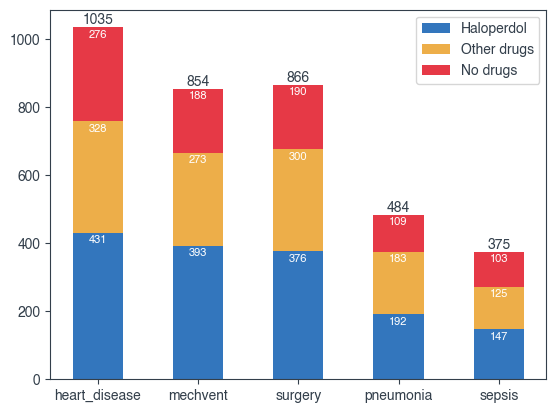

In [21]:
covariates = ("heart_disease","mechvent","surgery","pneumonia","sepsis")

colors = {
    "Haloperdol": '#3376BD',
    "Other drugs": '#EDAE49',
    "No drugs": '#E63946',
}

patient_counts = {
    "Haloperdol": np.array([431,393,376,192,147]),
    "Other drugs": np.array([328,273,300,183,125]),
    "No drugs": np.array([276,188,190,109,103]),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(5)

for key, value in patient_counts.items():
    p = ax.bar(covariates, value, width, label=key, bottom=bottom, color=colors[key])
    bottom += value

totals = []
for i in range(len(patient_counts['Haloperdol'])):
    totals.append(patient_counts['Haloperdol'][i]+patient_counts['No drugs'][i]+patient_counts['Other drugs'][i])
# totals = patient_counts.sum(axis=1)

y_offset = 10
for i, total in enumerate(totals):
    ax.text(i, total + y_offset, round(total), ha='center', weight='bold')

# Let's put the annotations inside the bars themselves by using a
# negative offset.
y_offset = -30
# For each patch (basically each rectangle within the bar), add a label.
for bar in ax.patches:
    ax.text(
      # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y() + y_offset,
      # This is actual value we'll show.
      round(bar.get_height()),
      # Center the labels and style them a bit.
      ha='center',
      color='w',
      weight='bold',
      size=8
  )


# ax.set_title("Count of medical incidents for patient population")
ax.legend(loc="upper right")

plt.savefig('five_feat_bar.png', dpi=300, bbox_inches='tight')
# plt.show()

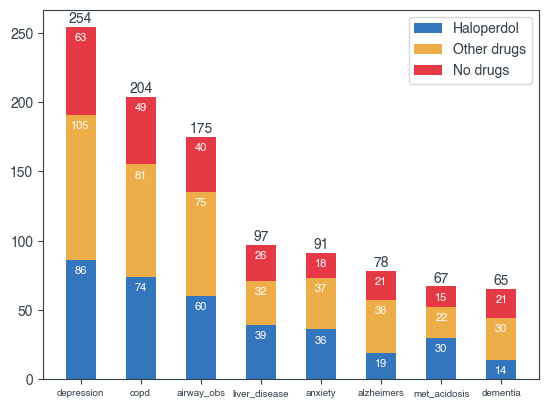

In [22]:
covariates = ("depression","copd","airway_obs","liver_disease","anxiety","alzheimers","met_acidosis","dementia")

colors = {
    "Haloperdol": '#3376BD',
    "Other drugs": '#EDAE49',
    "No drugs": '#E63946',
}

patient_counts = {
    "Haloperdol": np.array([86,74,60,39,36,19,30,14]),
    "Other drugs": np.array([105,81,75,32,37,38,22,30]),
    "No drugs": np.array([63,49,40,26,18,21,15,21]),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(8)

plt.xticks(fontsize=7)

for key, value in patient_counts.items():
    p = ax.bar(covariates, value, width, label=key, bottom=bottom, color=colors[key])
    bottom += value

totals = []
for i in range(len(patient_counts['Haloperdol'])):
    totals.append(patient_counts['Haloperdol'][i]+patient_counts['No drugs'][i]+patient_counts['Other drugs'][i])
# totals = patient_counts.sum(axis=1)

y_offset = 3
for i, total in enumerate(totals):
    ax.text(i, total + y_offset, round(total), ha='center', weight='bold')

# Let's put the annotations inside the bars themselves by using a
# negative offset.
y_offset = -10
# For each patch (basically each rectangle within the bar), add a label.
for bar in ax.patches:
    ax.text(
      # Put the text in the middle of each bar. get_x returns the start
      # so we add half the width to get to the middle.
      bar.get_x() + bar.get_width() / 2,
      # Vertically, add the height of the bar to the start of the bar,
      # along with the offset.
      bar.get_height() + bar.get_y() + y_offset,
      # This is actual value we'll show.
      round(bar.get_height()),
      # Center the labels and style them a bit.
      ha='center',
      color='w',
      weight='bold',
      size=8
  )


# ax.set_title("Count of medical incidents for patient population")
ax.legend(loc="upper right")

plt.savefig('eight_feat_bar.png', dpi=300, bbox_inches='tight')
# plt.show()

In [23]:
data['agebin'] = pd.cut(data['age'], [0, 15, 25, 35, 45, 55, 65, 75, 85, 95]) # , labels=['0-50', '50-100', '100-200']

agebin = data.groupby(['agebin'])['agebin'].count() # this is pd series
df = pd.DataFrame([agebin]).transpose() # this is now dataframe
df.head()

,agebin
agebin,
"(0, 15]",0
"(15, 25]",16
"(25, 35]",26
"(35, 45]",73
"(45, 55]",168


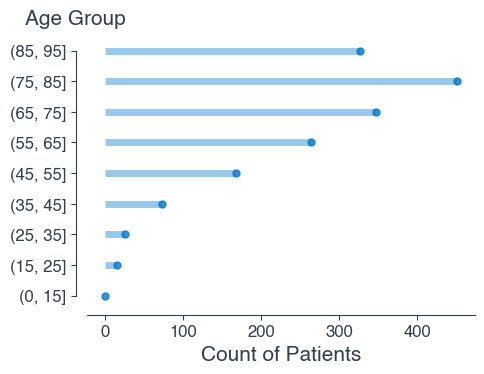

In [24]:
# we first need a numeric placeholder for the y axis
my_range=list(range(1,len(df.index)+1))

fig, ax = plt.subplots(figsize=(5,3.5))

# create for each expense type an horizontal line that starts at x = 0 with the length 
# represented by the specific expense percentage value.
plt.hlines(y=my_range, xmin=0, xmax=df['agebin'], color='#007ACC', alpha=0.4, linewidth=5)

# create for each expense type a dot at the level of the expense percentage value
plt.plot(df['agebin'], my_range, "o", markersize=5, color='#007ACC', alpha=0.8)

# set labels
ax.set_xlabel('Count of Patients', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, df.index)

# add an horizonal label for the y axis 
fig.text(0, 0.92, 'Age Group', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_bounds((1, len(my_range)))
# ax.set_xlim(0,25)

ax.spines['left'].set_position(('outward', 8))
ax.spines['bottom'].set_position(('outward', 5))

plt.savefig('age_bar.png', dpi=300, bbox_inches='tight')
# plt.show()

In [25]:
data['losbin'] = pd.cut(data['los_days'], [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 30, 40, 50, 60, 70, 80, 90, 100]) # , labels=['0-50', '50-100', '100-200']

losbin = data.groupby(['losbin'])['losbin'].count() # this is pd series
df = pd.DataFrame([losbin]).transpose() # this is now dataframe
df.head()

,losbin
losbin,
"(0, 2]",483
"(2, 4]",433
"(4, 6]",243
"(6, 8]",128
"(8, 10]",88


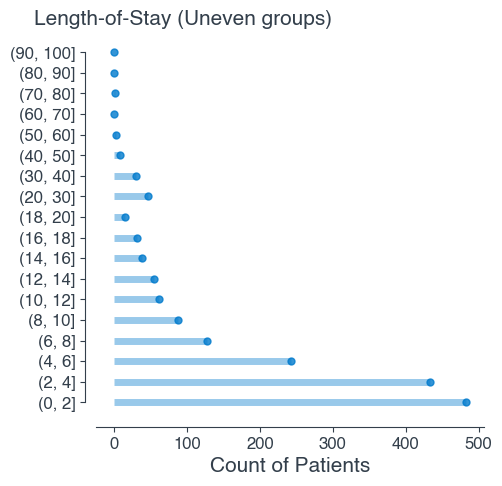

In [26]:
# we first need a numeric placeholder for the y axis
my_range=list(range(1,len(df.index)+1))

fig, ax = plt.subplots(figsize=(5,5))

# create for each expense type an horizontal line that starts at x = 0 with the length 
# represented by the specific expense percentage value.
plt.hlines(y=my_range, xmin=0, xmax=df['losbin'], color='#007ACC', alpha=0.4, linewidth=5)

# create for each expense type a dot at the level of the expense percentage value
plt.plot(df['losbin'], my_range, "o", markersize=5, color='#007ACC', alpha=0.8)

# set labels
ax.set_xlabel('Count of Patients', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('')

# set axis
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, df.index)

# add an horizonal label for the y axis 
fig.text(0, 0.9, 'Length-of-Stay (Uneven groups)', fontsize=15, fontweight='black', color = '#333F4B')

# change the style of the axis spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_bounds((1, len(my_range)))
# ax.set_xlim(0,25)

ax.spines['left'].set_position(('outward', 8))
ax.spines['bottom'].set_position(('outward', 5))

plt.savefig('los_bar.png', dpi=300, bbox_inches='tight')
# plt.show()